In [324]:
%reset -f
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [325]:
import sys
sys.path.append('../')

In [428]:
import sys
import os
import numpy as np
import scipy.io as sio
import pickle
from cyclingrnn.train import train_rnn

In [429]:
import os
import numpy as np
import tensorflow as tf
import scipy.io as sio
from scipy import signal
from cyclingrnn.custom_rnn_cells import BasicRNNCellNoise


In [328]:
import matplotlib.pyplot as plt

In [329]:
# hyperparameters
cur_params = {}
cur_params['activation']    = np.random.choice(['tanh', 'linear', 'softplus'])
cur_params['beta1']         = 10**np.random.uniform(-6, 0)
cur_params['beta2']         = 10**np.random.uniform(-6, 0)
cur_params['stddev_state']  = 0
cur_params['stddev_out']    = 0
cur_params['monkey']        = np.random.choice(['D'])
cur_params['num_neurons']   = np.random.randint(10, 100)

# fixed parameters
LEARNING_RATE = 0.0003
NUM_ITERS = 5000
LOAD_PREV = False
PREV_PATH = None

# current run and paths
CUR_SIM = 1
CUR_RUN = "testA"

NPSAVE_PATH = '../saves/'+CUR_RUN+'/npsaves/'
TFSAVE_PATH = '../saves/'+CUR_RUN+'/tfsaves/'
MLSAVE_PATH = '../saves/'+CUR_RUN+'/mlsaves/'
TB_PATH = '../saves/'+CUR_RUN+'/tb/'

def make_dir(path):
  """like os.makedirs(path) but avoids race conditions"""
  try:
    os.makedirs(path)
  except OSError:
    if not os.path.isdir(path):
      raise

make_dir(NPSAVE_PATH)
make_dir(TFSAVE_PATH)
make_dir(MLSAVE_PATH)

print 'Current Run: '+CUR_RUN


# save params
pickle.dump(cur_params, open(NPSAVE_PATH+str(CUR_SIM)+'params.pickle', 'wb'))

print cur_params

if LOAD_PREV:
  load_model_path = '../saves/'+PREV_PATH+'/tfsaves/'+str(CUR_SIM)
else:
  load_model_path = None


Current Run: testA
{'beta1': 0.00020132628250269814, 'monkey': 'D', 'num_neurons': 83, 'stddev_out': 0, 'activation': 'tanh', 'beta2': 6.804749546495195e-05, 'stddev_state': 0}


In [330]:
CUR_SIM = CUR_SIM+1

In [441]:
Y_TF, X_TF,y_data,u_data = train_rnn(monkey=cur_params['monkey'],
                                     beta1=0,
                                     beta2=0,
                                     stddev_state=0,
                                     stddev_out=0.,
                                     activation='tanh',
                                     num_neurons=20,
                                     learning_rate=0.003,
                                     num_iters=1000,
                                     save_model_path=TFSAVE_PATH+str(CUR_SIM),
                                     tb_path=TB_PATH+str(CUR_SIM),
                                     load_prev=False,
                                     load_model_path='../saves/testA/tfsaves/1')


[u'x0:0', u'C:0', u'd:0', u'my_rnn/BasicRNNCell/Linear/Matrix:0', u'my_rnn/BasicRNNCell/Linear/Bias:0']
  iter: 0000   Loss: 4.281813
  iter: 0500   Loss: 0.150127
  iter: 1000   Loss: 0.046851
  Finished


In [458]:
Y_TF, X_TF = train_rnn(monkey=cur_params['monkey'],
                                     beta1=0,
                                     beta2=0,
                                     stddev_state=0,
                                     stddev_out=0.,
                                     activation='softplus',
                                     rnn_init='xavier',
                                     num_neurons=20,
                                     learning_rate=0.003,
                                     num_iters=1000,
                                     save_model_path=TFSAVE_PATH+str(CUR_SIM),
                                     tb_path=TB_PATH+str(CUR_SIM),
                                     load_prev=False,
                                     load_model_path='../saves/testA/tfsaves/1')


  iter: 0000   Loss: 10.047109
  iter: 0500   Loss: 0.385290
  iter: 1000   Loss: 0.384580
  Finished


In [ ]:
tf.random_normal_initializer()

In [421]:
tf.variable_scope().

[40, 400, 400]

In [ ]:
tf.contrib.layers.xavier_initializer

In [ ]:
tf.constant_initializer()

In [362]:
y_data.shape

(100, 12, 5)

In [361]:
y_data = np.zeros((np.max(sequence_length), 4*3, 5))

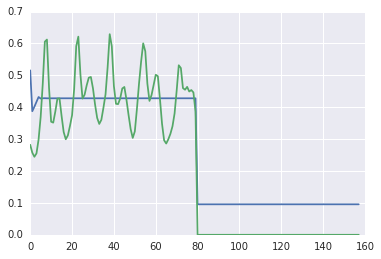

In [451]:
plt.plot(Y_TF[:,1,5])
plt.plot(y_data[:,1,5])

In [242]:
cur_params

{'activation': 'softplus',
 'beta1': 3.979096573847291e-06,
 'beta2': 0.006986615650824892,
 'monkey': 'D',
 'num_neurons': 38,
 'stddev_out': 0.0,
 'stddev_state': 0.0028959785153870607}